In [90]:
import subprocess
import json
import matplotlib.pyplot as plt

In [101]:
matrix_sizes = [100, 200, 300, 500, 800, 1000, 1200, 1500]
blocks = [1, 10, 20, 50, 100]
modes = [0, 1, 2]
mode_description = {
    0: 'линейный',
    1: 'первый цикл',
    2: 'второй цикл'
}

In [93]:
results = []
for ms in matrix_sizes:
    for b in blocks:
        for m in modes:
            command_result = subprocess.run(["cmake-build-debug/openmp_hello_world", str(ms), str(b), str(m)], capture_output=True)
            time_to_complete = float(command_result.stdout.decode('ascii').strip())
            print(f'size={ms}, block={b}, mode={m}, time={time_to_complete:.6f}')
            results += [{'matrix': ms, 'block': b, 'mode': m, 'time': time_to_complete}]
            
with open('data.json', 'w') as fp:
    json.dump(results, fp)

size=100, block=1, mode=0, time=0.027040
size=100, block=1, mode=1, time=0.013234
size=100, block=1, mode=2, time=0.292677
size=100, block=10, mode=0, time=0.020363
size=100, block=10, mode=1, time=0.009843
size=100, block=10, mode=2, time=0.014317
size=100, block=20, mode=0, time=0.016007
size=100, block=20, mode=1, time=0.009236
size=100, block=20, mode=2, time=0.021311
size=100, block=50, mode=0, time=0.020010
size=100, block=50, mode=1, time=0.011245
size=100, block=50, mode=2, time=0.011246
size=100, block=100, mode=0, time=0.015002
size=100, block=100, mode=1, time=0.016532
size=100, block=100, mode=2, time=0.016338
size=200, block=1, mode=0, time=0.210905
size=200, block=1, mode=1, time=0.119176
size=200, block=1, mode=2, time=0.450849
size=200, block=10, mode=0, time=0.302439
size=200, block=10, mode=1, time=0.167792
size=200, block=10, mode=2, time=0.233129
size=200, block=20, mode=0, time=0.236931
size=200, block=20, mode=1, time=0.095423
size=200, block=20, mode=2, time=0.19

In [97]:
with open('data.json', 'r') as fp:
    results = json.load(fp)

размер блока: 20


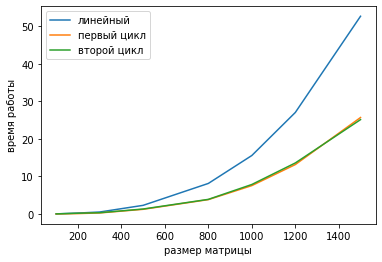

In [113]:
b = blocks[2]
for m in modes:
    x = [i['matrix'] for i in results if i['mode'] == m and i['block']==b]
    y = [i['time'] for i in results if i['mode'] == m and i['block']==b]
    plt.plot(x, y, label=mode_description[m])
plt.legend()
plt.xlabel('размер матрицы')
plt.ylabel('время работы')
print(f'размер блока: {b}')

режим: 0


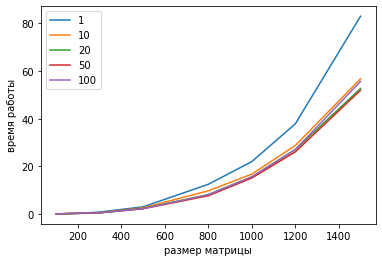

In [115]:
m = 0
for b in blocks:
    x = [i['matrix'] for i in results if i['mode'] == m and i['block']==b]
    y = [i['time'] for i in results if i['mode'] == m and i['block']==b]
    plt.plot(x, y, label=f'{b}')
plt.legend()
plt.xlabel('размер матрицы')
plt.ylabel('время работы')
print(f'режим: {m}')

режим: 1


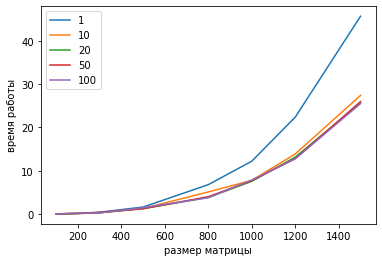

In [116]:
m = 1
for b in blocks:
    x = [i['matrix'] for i in results if i['mode'] == m and i['block']==b]
    y = [i['time'] for i in results if i['mode'] == m and i['block']==b]
    plt.plot(x, y, label=f'{b}')
plt.legend()
plt.xlabel('размер матрицы')
plt.ylabel('время работы')
print(f'режим: {m}')

режим: 2


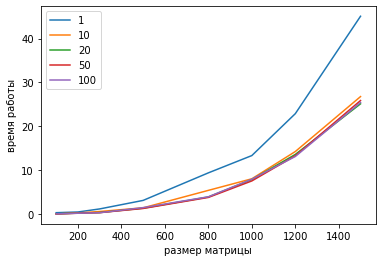

In [117]:
m = 2
for b in blocks:
    x = [i['matrix'] for i in results if i['mode'] == m and i['block']==b]
    y = [i['time'] for i in results if i['mode'] == m and i['block']==b]
    plt.plot(x, y, label=f'{b}')
plt.legend()
plt.xlabel('размер матрицы')
plt.ylabel('время работы')
print(f'режим: {m}')

размер блока: 10


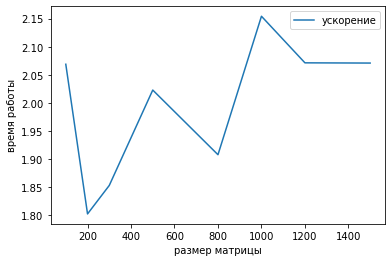

In [120]:
b = blocks[1]
x = [i['matrix'] for i in results if i['mode'] == m and i['block']==b]
y1 = [i['time'] for i in results if i['mode'] == 0 and i['block']==b]
y2 = [i['time'] for i in results if i['mode'] == 1 and i['block']==b]
plt.plot(x, [a / b for (a, b) in zip(y1, y2)], label='ускорение')
plt.legend()
plt.xlabel('размер матрицы')
plt.ylabel('время работы')
print(f'размер блока: {b}')